In [9]:
# === Import Library ===
import pandas as pd

# === Membaca File Dataset ===
# Jika file Excel tidak terbaca sebagai tabel, coba baca sebagai CSV
try:
    df = pd.read_excel("Automobile_data.xlsx")
except:
    df = pd.read_csv("Automobile_data.xlsx")

# === Memeriksa apakah kolom masih menjadi satu string panjang ===
if len(df.columns) == 1:
    # Pisahkan kolom berdasarkan koma (",")
    df = df[df.columns[0]].str.split(",", expand=True)
    
    # Beri nama kolom sesuai dengan dataset Automobile
    df.columns = [
        'symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
        'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
        'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'
    ]

print("✅ Kolom berhasil dipisahkan dengan benar!")
print("Daftar kolom:", df.columns.tolist())

# Tampilkan 5 baris pertama untuk memastikan hasilnya benar
print("\nContoh data:")
print(df.head())


✅ Kolom berhasil dipisahkan dengan benar!
Daftar kolom: ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Contoh data:
  symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0         3                 ?  alfa-romero       gas        std          two   
1         3                 ?  alfa-romero       gas        std          two   
2         1                 ?  alfa-romero       gas        std          two   
3         2               164         audi       gas        std         four   
4         2               164         audi       gas        std         four   

    body-style drive-wheels engine-location wheel-base  ... engine-size  \
0  convertible 

In [14]:
# === Membersihkan Data ===

# Hilangkan spasi di nama kolom
df.columns = df.columns.str.strip()

# Konversi kolom numerik yang penting ke angka
cols_needed = ['horsepower', 'curb-weight', 'price']

for col in cols_needed:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris yang memiliki nilai kosong di kolom penting
df = df.dropna(subset=cols_needed).reset_index(drop=True)

print("✅ Data sudah dibersihkan. Bentuk data sekarang:", df.shape)
print(df[cols_needed].head())


✅ Data sudah dibersihkan. Bentuk data sekarang: (96, 26)
   horsepower  curb-weight    price
0         111         2548  13495.0
1         111         2548  16500.0
2         154         2823  16500.0
3         102         2337  13950.0
4         115         2824  17450.0


In [15]:
# === Membuat Fungsi Fuzzy Efficiency ===

def fuzzy_efficiency(horsepower, curb_weight):
    """
    Menghitung efisiensi fuzzy berdasarkan horsepower dan berat kendaraan.
    Nilai efisiensi di-normalisasi antara 0–100.
    """
    try:
        # Contoh logika sederhana:
        # Efisiensi turun jika horsepower tinggi dan berat besar
        eff = (1 / (0.5 * horsepower + 0.0005 * curb_weight)) * 10000
        eff = max(0, min(eff, 100))  # batasi nilai antara 0-100
        label = (
            "Tinggi" if eff > 70 else
            "Sedang" if eff > 40 else
            "Rendah"
        )
        return eff, label
    except:
        return np.nan, "Tidak Diketahui"


In [10]:
# Membership function untuk horsepower
def mu_hp_low(x): return trapezoid(x, 40, 40, 70, 90)
def mu_hp_med(x): return triangle(x, 80, 100, 150)
def mu_hp_high(x): return trapezoid(x, 130, 160, 200, 250)

# Membership function untuk berat mobil
def mu_wt_light(x): return trapezoid(x, 1500, 1500, 2200, 2600)
def mu_wt_med(x): return triangle(x, 2400, 3000, 3600)
def mu_wt_heavy(x): return trapezoid(x, 3400, 4000, 5000, 5500)

# Membership function untuk output efisiensi
def mu_eff_low(y): return triangle(y, 0, 0, 50)
def mu_eff_med(y): return triangle(y, 30, 50, 70)
def mu_eff_high(y): return triangle(y, 60, 100, 100)


In [16]:
# === Terapkan Fuzzy Logic ke seluruh dataset ===

df["fuzzy_efficiency"], df["eff_label"] = zip(
    *df.apply(lambda x: fuzzy_efficiency(x["horsepower"], x["curb-weight"]), axis=1)
)

print("✅ Fuzzy logic berhasil diterapkan!")
print(df[["horsepower", "curb-weight", "fuzzy_efficiency", "eff_label"]].head())


✅ Fuzzy logic berhasil diterapkan!
   horsepower  curb-weight  fuzzy_efficiency eff_label
0         111         2548             100.0    Tinggi
1         111         2548             100.0    Tinggi
2         154         2823             100.0    Tinggi
3         102         2337             100.0    Tinggi
4         115         2824             100.0    Tinggi


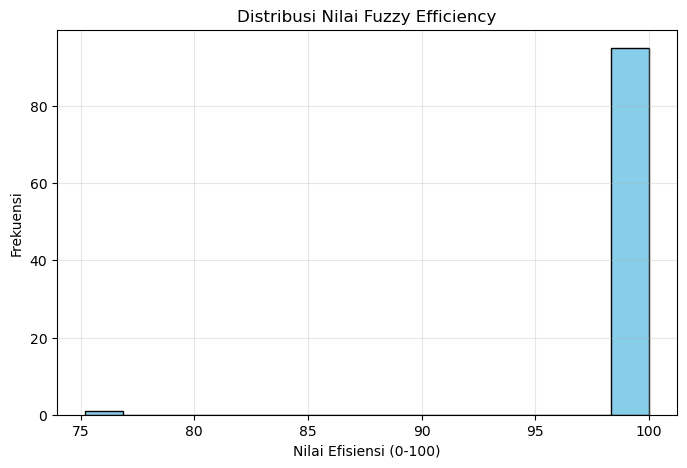

In [17]:
# === Visualisasi Distribusi Fuzzy Efficiency ===

plt.figure(figsize=(8,5))
plt.hist(df["fuzzy_efficiency"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribusi Nilai Fuzzy Efficiency")
plt.xlabel("Nilai Efisiensi (0-100)")
plt.ylabel("Frekuensi")
plt.grid(alpha=0.3)
plt.show()


In [18]:
# === Statistik Ringkasan ===
print("Rata-rata Efisiensi:", round(df["fuzzy_efficiency"].mean(), 2))
print("Nilai Maksimum:", round(df["fuzzy_efficiency"].max(), 2))
print("Nilai Minimum:", round(df["fuzzy_efficiency"].min(), 2))

print("\nDistribusi Label Efisiensi:")
print(df["eff_label"].value_counts())


Rata-rata Efisiensi: 99.74
Nilai Maksimum: 100.0
Nilai Minimum: 75.2

Distribusi Label Efisiensi:
eff_label
Tinggi    96
Name: count, dtype: int64
